<a href="https://colab.research.google.com/github/manasik29/Neural-Networks/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# convolutions 3*3

# maxpooling

In [ ]:
# from __future__ import print_function
# import keras
# from keras.datasets import cifar10
# from keras.preprocessing.image import ImageDataGenerator
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Activation, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# import os
# import keras.backend as k
# from keras.applications.vgg16 import VGG16
# from keras.applications.vgg16 import preprocess_input
# from keras.preprocessing.image import load_img
# from keras.preprocessing.image import img_to_array
# from keras.models import Model
# from matplotlib import pyplot

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import pyplot
import os
import tensorflow as tf 


In [3]:

#load mnist dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() #everytime loading data won't be so easy :)




11501568/11490434 [==============================] - 0s 0us/step


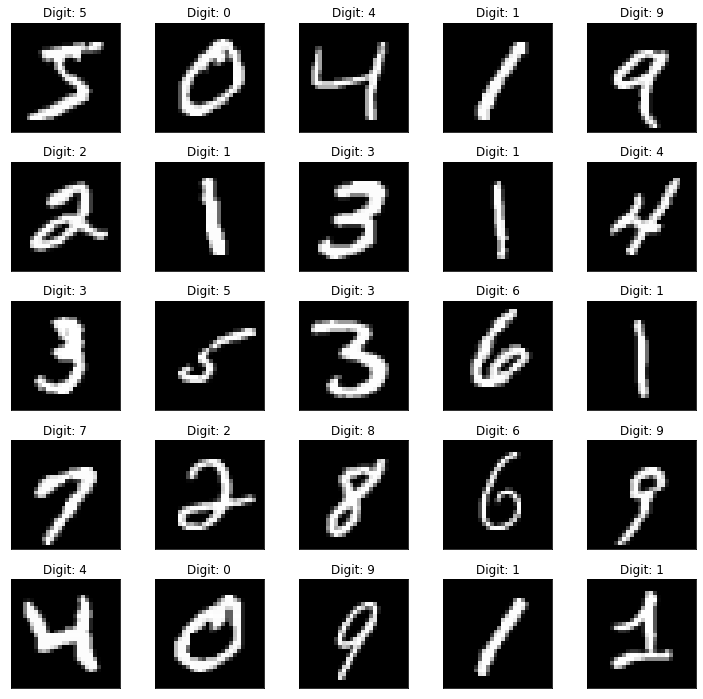

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=[10,10])
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


In [10]:
X_train.shape

(60000, 28, 28, 1)

In [6]:
#preprocessing input data
img_rows, img_cols=28,28
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape) 

X_train shape: (60000, 28, 28, 1)


In [8]:
#set number of categories
num_category = 10
# convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_category)
# y_test = keras.utils.to_categorical(y_test, num_category)

In [11]:
model = tf.keras.models.Sequential()
#convolutional layer with rectified linear unit activation
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2))
#randomly turn neurons on and off to improve convergence
model.add(tf.keras.layers.Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(tf.keras.layers.Flatten())
#fully connected to get all relevant data
model.add(tf.keras.layers.Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(tf.keras.layers.Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(tf.keras.layers.Dense(num_category, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [13]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [14]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 138s 292ms/step - loss: 2.2727 - accuracy: 0.1628 - val_loss: 2.2423 - val_accuracy: 0.2630
Epoch 2/10
469/469 [==============================] - 137s 291ms/step - loss: 2.2249 - accuracy: 0.2472 - val_loss: 2.1825 - val_accuracy: 0.4025
Epoch 3/10
469/469 [==============================] - 136s 290ms/step - loss: 2.1617 - accuracy: 0.3217 - val_loss: 2.1030 - val_accuracy: 0.5118
Epoch 4/10
469/469 [==============================] - 137s 292ms/step - loss: 2.0768 - accuracy: 0.4019 - val_loss: 1.9974 - val_accuracy: 0.5937
Epoch 5/10
469/469 [==============================] - 137s 292ms/step - loss: 1.9707 - accuracy: 0.4712 - val_loss: 1.8629 - val_accuracy: 0.6536
Epoch 6/10
469/469 [==============================] - 137s 292ms/step - loss: 1.8363 - accuracy: 0.5373 - val_loss: 1.6972 - val_accuracy: 0.6997
Epoch 7/10
469/469 [==============================] - 137s 293ms/step - loss: 1.6819 - accuracy: 0.5828 - val_loss: 1.5102 -

In [15]:
model.layers

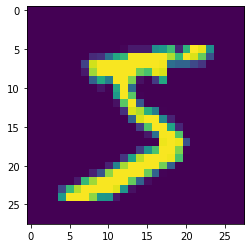

In [28]:
plt.imshow(X_train[0][:,:,0])

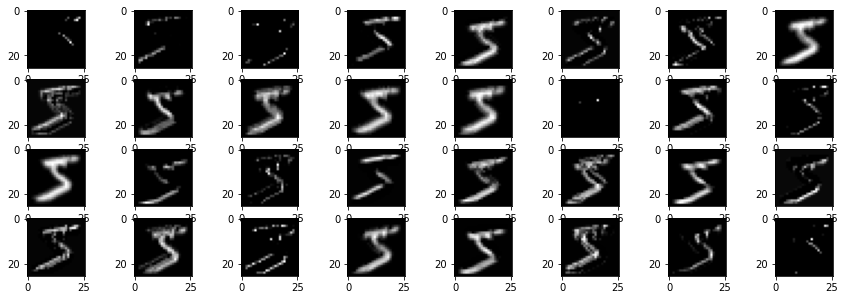

In [29]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
#model2.summary() 1st layer
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()

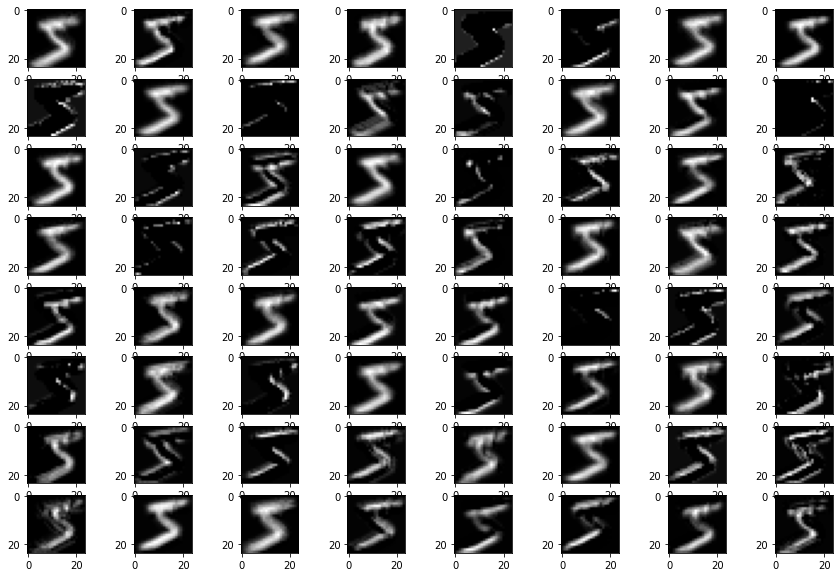

In [30]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
#model2.summary() 2nd layer
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

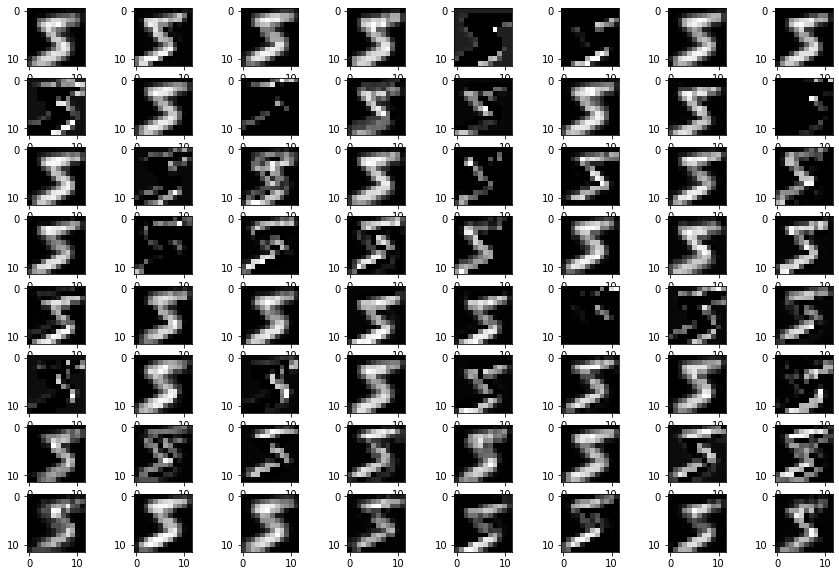

In [31]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)
#model2.summary()      3rd layer
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

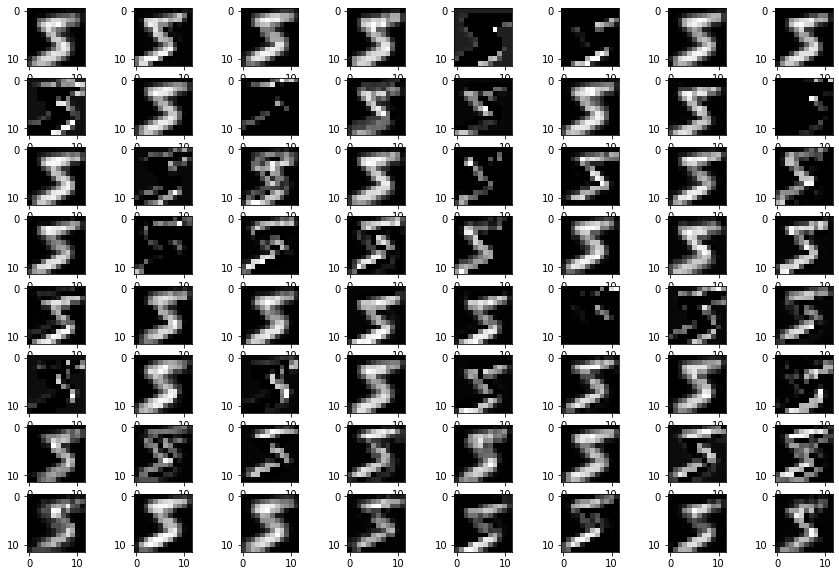

In [32]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[3].output)
#model2.summary()     4th layer
feature_maps = model2.predict(X_train[0:1])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

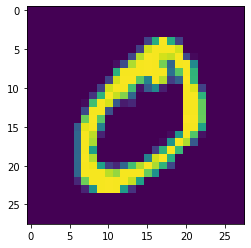

In [33]:
plt.imshow(X_train[1][:,:,0])

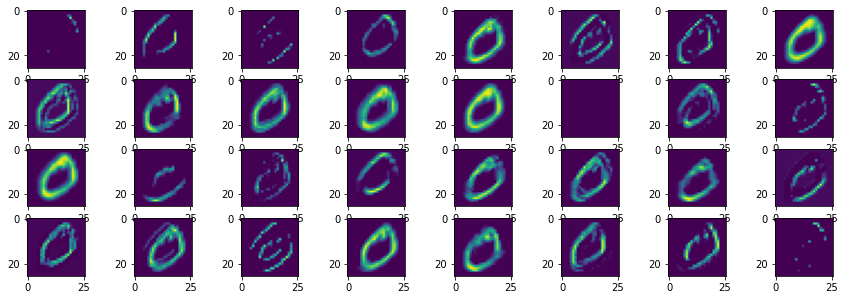

In [34]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[0].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i])
plt.show()    

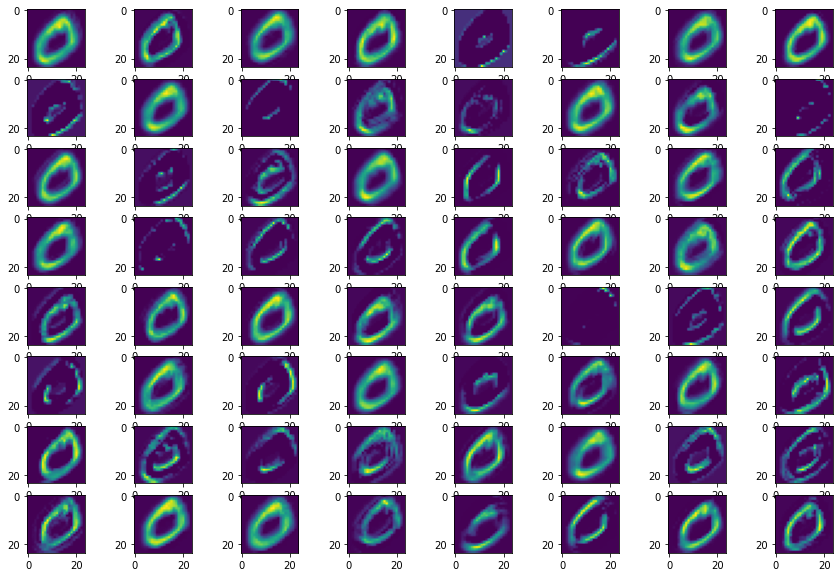

In [35]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[1].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i])
plt.show()    

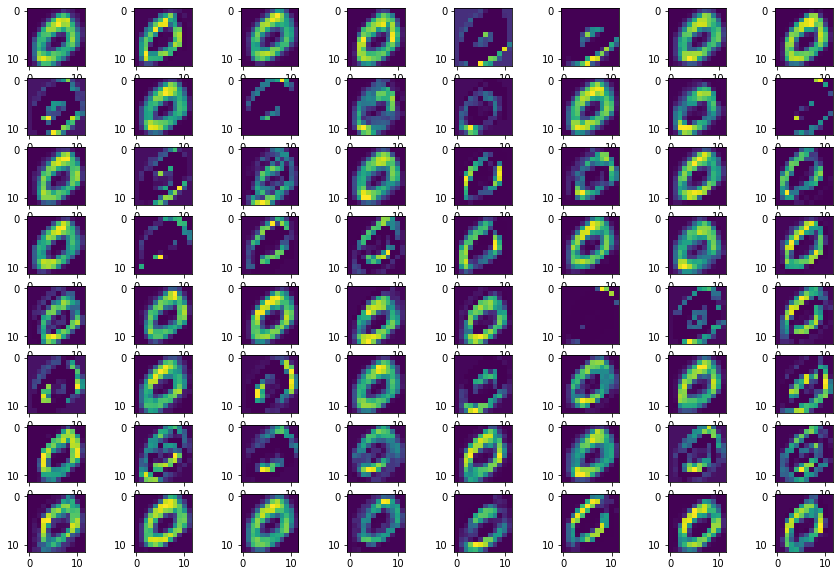

In [36]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[2].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i])
plt.show()    

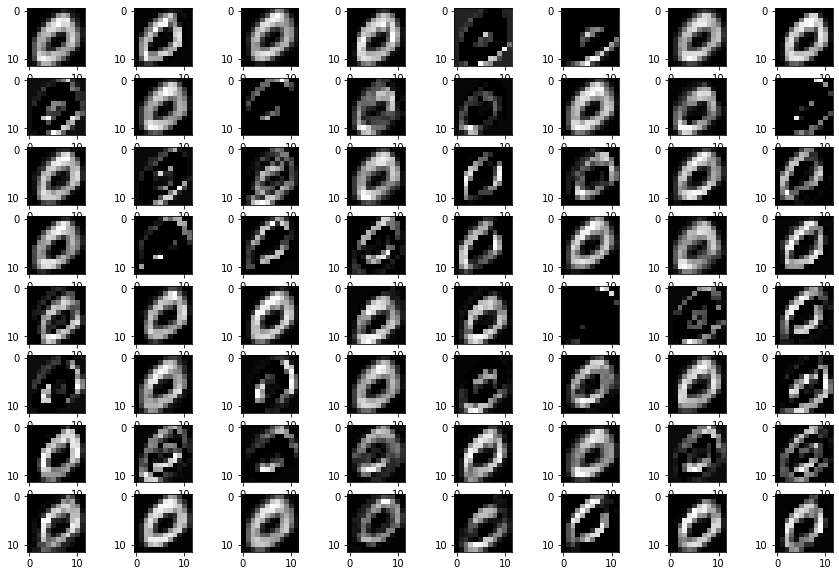

In [37]:
model2 = tf.keras.models.Model(inputs=model.inputs, outputs=model.layers[3].output)
#model2.summary()
feature_maps = model2.predict(X_train[1:2])
plt.figure(figsize=(15,10))
for i in range(feature_maps.shape[-1]):
       plt.subplot(8,8,i+1)
       plt.imshow(feature_maps[0][:,:,i],cmap="gray")
plt.show()    

# object detection

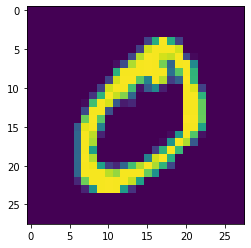

In [42]:
pic=X_train[1][:,:,0]
plt.imshow(pic)